# HW 6

In [1]:
import scipy.io
from io import BytesIO
import requests
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

## 1. Order the faces

In [2]:
# Load data
url = 'https://github.com/yao-lab/yao-lab.github.io/raw/master/data/face.mat' 
response = requests.get(url) 
face_data = scipy.io.loadmat(BytesIO(response.content))
print(face_data.keys())
images = face_data['Y']
print(images.shape)
x = np.reshape(images, [10304, 33]).T
print(x.shape)

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'id'])
(112, 92, 33)
(33, 10304)


In [3]:
# function for image scatter plot after embedding
def image_scatter(imgs, y_emb, axs, scale=0.3):
    # draw points one by one
    for i in range(y_emb.shape[1]):
        img = imgs[:, :, i]
        imagebox = OffsetImage(img, zoom=scale, cmap='gray')
        ab = AnnotationBbox(imagebox, (y_emb[0, i], y_emb[1, i]), frameon=False)
        axs.add_artist(ab)


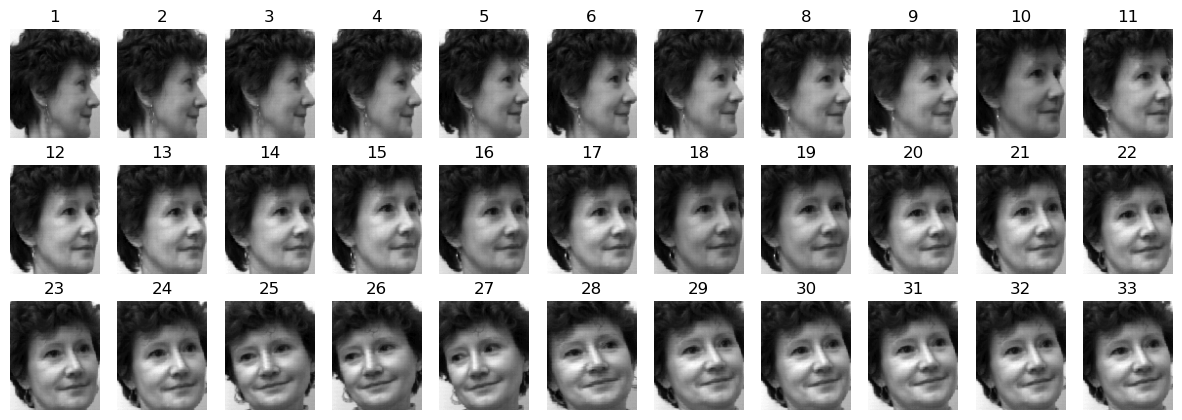

In [4]:
# Show image in default order
img_id = face_data['id'][0].copy()
ordered_idx = np.argsort(img_id)

fig, axs = plt.subplots(3, 11, figsize=(15, 5))
axs = axs.flatten()
for i in range(33):
    axs[i].imshow(images[:, :, ordered_idx[i]], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(str(img_id[ordered_idx[i]]))


A:\Academic\anaconda3\envs\dl\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


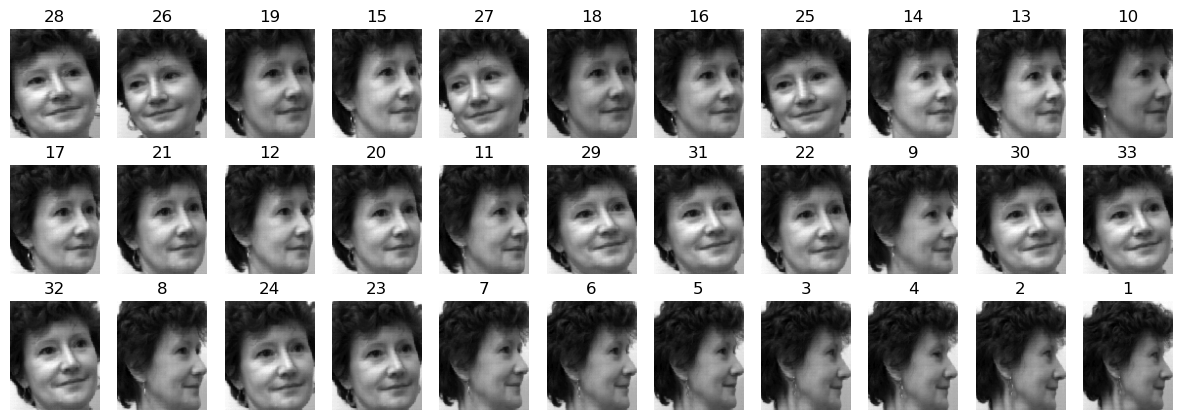

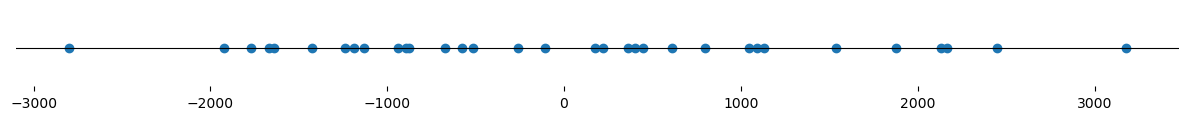

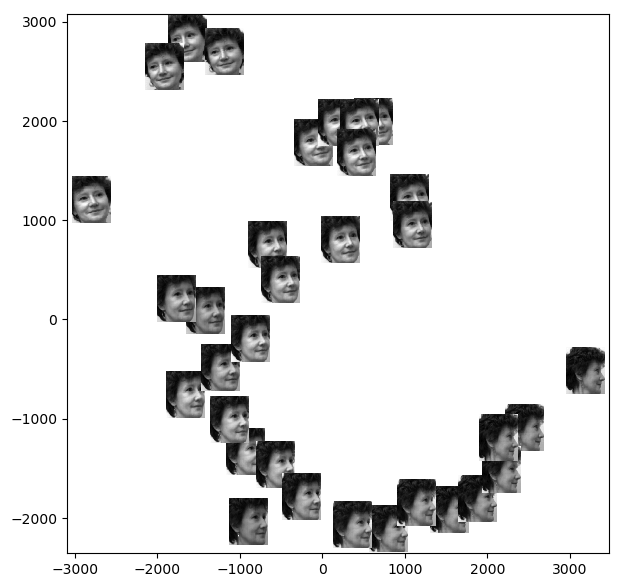

In [19]:
# (a) MDS embedding
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity='euclidean')
y_mds = mds.fit_transform(x).T

# Visualize LTSA-embedding for 1D and 2D case
# 1D
fig, axs = plt.subplots(3, 11, figsize=(15, 5))
axs = axs.flatten()
x_mds = y_mds[0]
idx = np.argsort(x_mds)
mds_ordered = img_id[idx]  # save the order for later comparison
for i in range(33):
    axs[i].imshow(images[:, :, idx[i]], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(str(img_id[idx[i]]))

fig_1d, axs_1d = plt.subplots(1, 1, figsize=(15, 1))
axs_1d.scatter(x_mds[idx], [0 for i in range(len(idx))])
axs_1d.axhline(0, color='black',linewidth=0.8)
axs_1d.set_yticks([])
axs_1d.spines['left'].set_visible(False)
axs_1d.spines['right'].set_visible(False)
axs_1d.spines['top'].set_visible(False)
axs_1d.spines['bottom'].set_visible(False)

# 2D
fig_2d, axs_2d = plt.subplots(1, 1, figsize=(7, 7))
axs_2d.scatter(y_mds[0], y_mds[1], c='g', marker='o')
# Set the image for each point
image_scatter(imgs=images, y_emb=y_mds, axs=axs_2d)



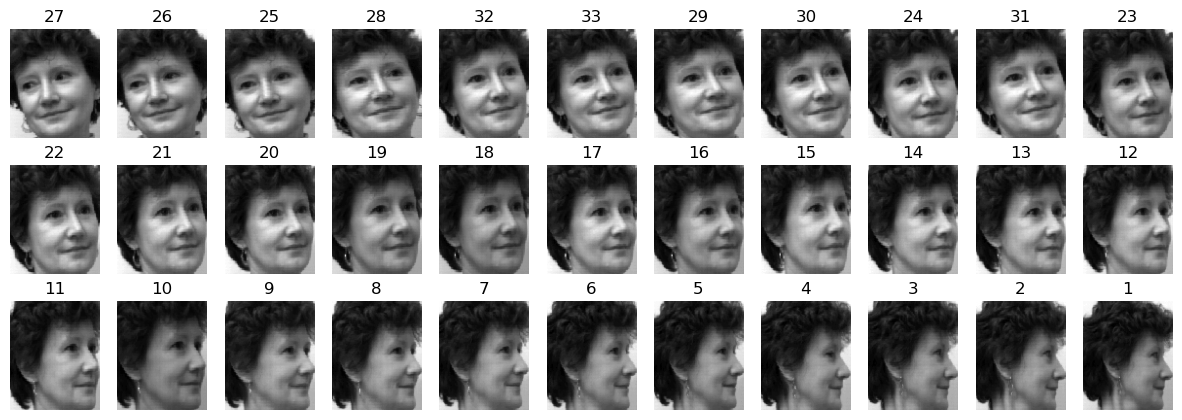

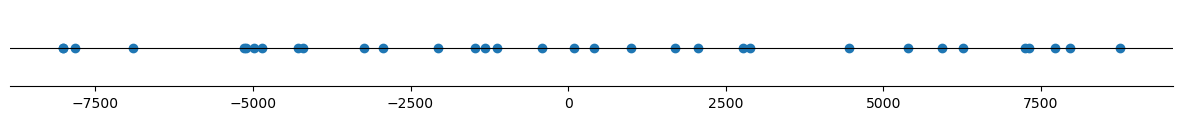

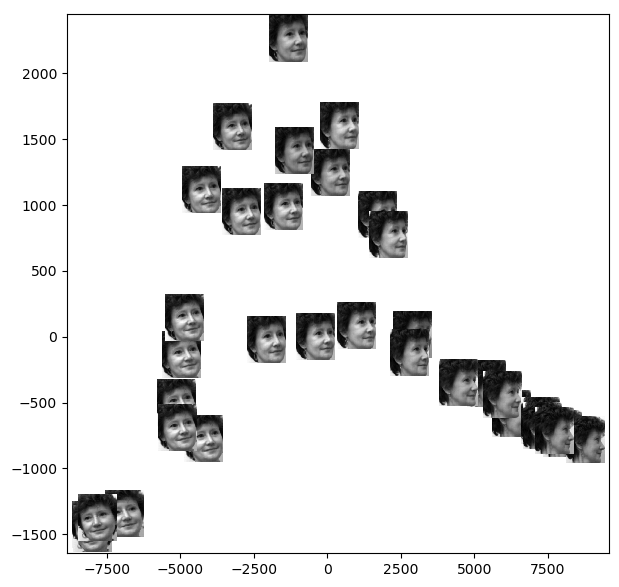

In [16]:
# (b) ISOMAP embedding
from sklearn.manifold import Isomap

iso = Isomap(n_components=2, n_neighbors=5)
y_iso = iso.fit_transform(x).T

# Visualize
fig, axs = plt.subplots(3, 11, figsize=(15, 5))
axs = axs.flatten()
x_iso = y_iso[0]
idx = np.argsort(x_iso)
iso_ordered = img_id[idx]  # save the order for later comparison
for i in range(33):
    axs[i].imshow(images[:, :, idx[i]], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(str(img_id[idx[i]]))

fig_1d, axs_1d = plt.subplots(1, 1, figsize=(15, 1))
axs_1d.scatter(x_iso[idx], [0 for i in range(len(idx))])
axs_1d.axhline(0, color='black',linewidth=0.8)
axs_1d.set_yticks([])
axs_1d.spines['left'].set_visible(False)
axs_1d.spines['right'].set_visible(False)
axs_1d.spines['top'].set_visible(False)

fig_2d, axs_2d = plt.subplots(1, 1, figsize=(7, 7))
axs_2d.scatter(y_iso[0], y_iso[1], c='g', marker='o')
# Set the image for each point
image_scatter(imgs=images, y_emb=y_iso, axs=axs_2d)

MDS typically uses Euclidean distances directly from the high-dimensional space, while Isomap uses geodesic distances estimated from the neighborhood graph , which can capture the intrinsic geometry of data that lies on a curved manifold. Compare to MDS, ISOMAP order the faces in a more reasonable way.

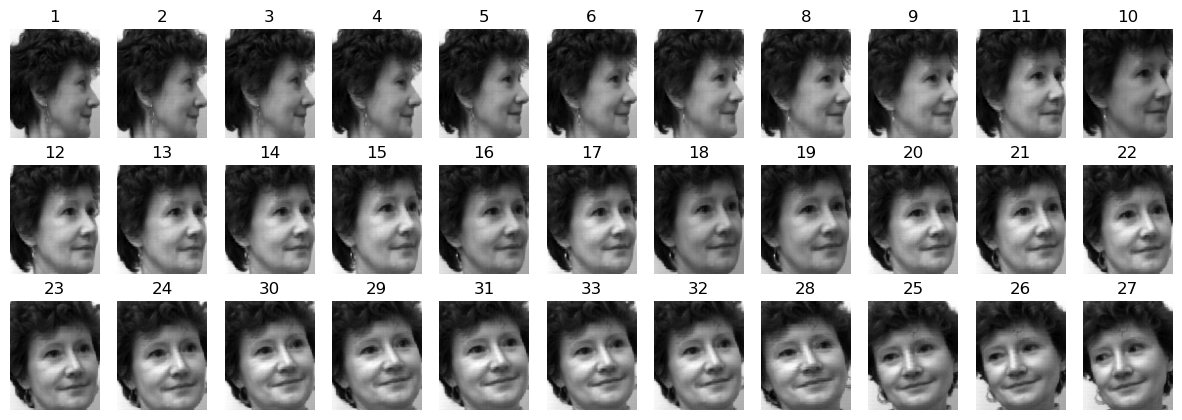

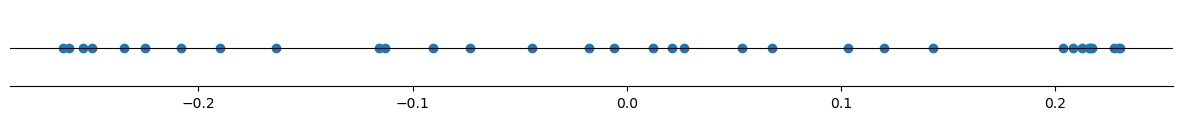

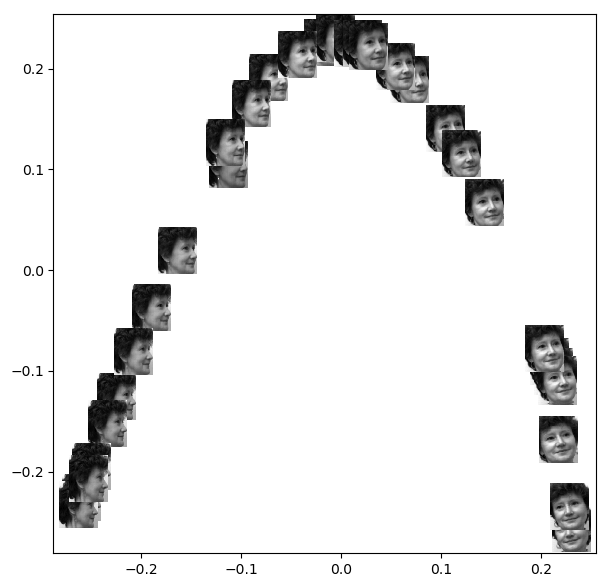

In [17]:
# (c) LLE embedding
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=5)
y_lle = lle.fit_transform(x).T

# Visualize
fig, axs = plt.subplots(3, 11, figsize=(15, 5))
axs = axs.flatten()
x_lle = y_lle[0]
idx = np.argsort(x_lle)
lle_ordered = img_id[idx]  # save the order for later comparison
for i in range(33):
    axs[i].imshow(images[:, :, idx[i]], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(str(img_id[idx[i]]))

fig_1d, axs_1d = plt.subplots(1, 1, figsize=(15, 1))
axs_1d.scatter(x_lle[idx], [0 for i in range(len(idx))])
axs_1d.axhline(0, color='black',linewidth=0.8)
axs_1d.set_yticks([])
axs_1d.spines['left'].set_visible(False)
axs_1d.spines['right'].set_visible(False)
axs_1d.spines['top'].set_visible(False)

fig_2d, axs_2d = plt.subplots(1, 1, figsize=(7, 7))
axs_2d.scatter(y_lle[0], y_lle[1], c='g', marker='o')
# Set the image for each point
image_scatter(imgs=images, y_emb=y_lle, axs=axs_2d)


ISOMAP focuses on preserving global geometric relationships (geodesic distances), making it suitable for datasets where such a global perspective accurately reflects the intrinsic geometry. In contrast, LLE focuses on preserving local linear relationships, which makes it more adept at uncovering local manifold structures. The difference imply LLE can deal waith sequence data well for ordering. Compare to ISOMAP, LLE order the faces in a more reasonable way.